In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# 1. Diffusion on a semi-infinite interval (7 points)

### (a) Find an analytic solution of the 1D Fokker-Planck equation on a semi-infinite interval $x∈[0,∞)$ with the origin $x= 0$ being an adsorbing boundary, i.e. $P(0,t) = 0$ ( $P(∞,t) = 0$ as well. This is a so-called natural boundary condition). Assume that the initial condition is given by $P(x,t= 0) =δ(x−x_0)$ , the diffusion coefficient is $D= \text{const}$ and the constant drift $u$ is present in the system (i.e.$U(x) =u·x$ )

1D Fokker-Planck equation
\begin{equation}
\frac{\partial P(x, t)}{\partial t}=\frac{u}{\gamma} \frac{\partial}{\partial x}P(x, t)+D\frac{\partial^{2}}{\partial x^{2}}P(x, t), x \geq 0
\end{equation}

$
\frac{\partial}{\partial t} P(x, t)=\frac{u}{\gamma} \frac{\partial}{\partial x} P(x, t)+D \frac{\partial^{2}}{\partial x^{2}} P(x, t), \\
\frac{\partial}{\partial t} F\{P(x, t)\}=\frac{u}{\gamma} F\left\{\frac{\partial}{\partial x} P(x, t)\right\}+D F\left\{\frac{\partial^{2}}{\partial x^{2}} P(x, t)\right\}, \\
F\left\{\frac{d^{n} f(x)}{d x^{n}}\right\}=(2 \pi i ξ)^{n} f(\xi), \\
\frac{\partial}{\partial t} P(\xi, t)=\frac{u}{\gamma}(2 \pi i\xi) P(\xi, t)+D(2 \pi i \xi)^{2} P(\xi, t), \\
\frac{\partial}{\partial t} P(\xi, t)=\left(\frac{2 \pi u \xi}{\gamma} i-4 \pi^{2}\xi^{2} D\right) P(\xi, t), \\
\int \frac{\partial P(\xi, t)}{P}=\int\left(\frac{2 \pi u}{\gamma}\ i-4 \pi^{2} D \xi^{2}\right) d t \\
\ln P(\xi, t)=\left(\frac{2 \pi u}{\gamma} \xi i-4 \pi^{2} D \xi^{2}\right) t+C \\
P(\xi, t)=C e^{ \left(\frac{2 \pi u}{\gamma}\xi i-4 \pi^{2} D \xi^{2}\right) t}
$

initial condition:
$
P(x,t= 0) =δ(x−x_0) ⇒ P(\xi,t=0)=F \left\{P(x,t=0)\right\}=F \left\{\delta(x-x_0)\right\}=e^{-2\pi x_0 \xi i }
$
$
P(\xi,t=0) = C = e^{-2\pi x_0 \xi i } ⇒ $
$$
P(\xi, t)=
e^{ \left(\frac{2 \pi u}{\gamma}\xi i-4 \pi^{2} D \xi^{2}\right) t -2\pi x_0 \xi i}
=e^{ (\frac{u}{\gamma}t -  x_0)2\pi\xi i -4 \pi^{2} D \xi^{2} t}
$$

$
P(x,t) = F^{-1}\{P(\xi,t)\} = \int_{-∞}^{+\infty} P(\xi,t)d\xi
= \int_{-∞}^{+\infty} e^{-4 \pi^{2} D \xi^{2} t}e^{ (\frac{u}{\gamma}t -  x_0)2\pi\xi i } d\xi = \dfrac{1}{\sqrt{4\pi D t}}e^{-\dfrac{\left(\dfrac{ut}{\gamma}+x-x_0 \right)^2 }{4Dt}}
$

 **Method of images**
$$
\text{new variable}: v = u/\gamma\\
P_m(x, t) = \frac{1}{\sqrt{4 \pi D t}} e^{-\frac{(x + x_0 + vt)^2}{4 D t}}\\
0 = P(0 , t) - C_m P_m(0, t) = \frac{1}{\sqrt{4 \pi D t}} e^{-\frac{(0 - x_0 + vt)^2}{4 D t}} - C_m \frac{1}{\sqrt{4 \pi D t}} e^{-\frac{(0 + x_0 + vt)^2}{4 D t}}\\
C_m = e^{\frac{vx_0}{D}}
$$ 

Now, $P(x,t) = \frac{1}{\sqrt{4 \pi D t}} \left( e^{-\frac{(x - x_0 + vt)^2}{4 D t}} - e^{\frac{vx_0}{D}} e^{-\frac{(x + x_0 + vt)^2}{4 D t}} \right)$

### (b) Calculate the survival probability $S(t)  =∫^∞_0P(x,t)dx$ , i.e. the probability that aboundary was not reached, and first-passage probability $φ_{FP}(t) =−\dfrac{dS(t)}{dt}$.

\begin{equation}
\begin{aligned}
&\varphi(t)=-\frac{d S(t)}{d t}=-\int_{0}^{\infty} \frac{d}{d t} P(x, t) d t=-\int_{0}^{\infty} v \frac{\partial}{\partial x} P\left(x_{1} t\right) d x-\int_{0}^{\infty} D \frac{\partial^{2}}{\partial x^{2}} P(x, t) d x= \\
&=-\left.\left.v P(x, t)\right|_{x=0} ^{\infty} - D\left(\frac{\partial P}{\partial x}\right)\right|_{x=0} ^{\infty}=v P(x=0, t)+D \frac{\partial P(x=0, t)}{\partial x}=D \frac{\partial P(x=0, t)}{\partial x} \\
&\varphi(t)
=\left.\frac{D}{\sqrt{4 \pi D t}}\left[-\frac{2\left(x-x_{0}+vt \right)}{4 D t}e^{-\frac{\left(x- x_{0}+vt\right)^{2}}{4 D t} }
+ e^{\frac{vx_0}{D}}\frac{2\left(x+x_{0}+vt\right)}{4 D t} e^{-\frac{\left(x+x_{0}+vt\right)^{2}}{4 D t}}\right]\right|_{x=0}= \\
&=\frac{x_{0}}{\sqrt{4 \pi D t^{3}}} e^{-\frac{\left(x_{0}-vt\right)^{2}}{4 D t}} = \varphi(t)
\end{aligned}
\end{equation}

$
S(t) = \int_0^\infty P(x,t) dx\\
\int_0^\infty e^{-\dfrac{(x-a)^2}{b}} dx = |x_1=x-a| = \int_{-a}^\infty e^{\dfrac{-x_1^2}{b}} dx_1 = |x2=x1/\sqrt{b}|=\sqrt{b}\int_{-\frac{a}{\sqrt{b}}}^\infty e^{-x_2^2} dx_2 = \dfrac{\sqrt{b\pi}}{2}\left( \text{erf}(\dfrac{a}{\sqrt{b}})+1 \right)\\
\text{first exponent: } a = x_0-vt, b = 4Dt\\
I_1 = \dfrac{\sqrt{4\pi Dt}}{2}\left( \text{erf}(\dfrac{x_0-vt}{\sqrt{4Dt}})+1 \right)=\dfrac{\sqrt{4\pi Dt}}{2} \text{erfc}(\dfrac{vt-x_0}{\sqrt{4Dt}})\\
\text{second exponent: } a = -x_0-vt, b = 4Dt\\
I_2 = \dfrac{\sqrt{4\pi Dt}}{2}\left( -\text{erf}(\dfrac{x_0+vt}{\sqrt{4Dt}})+1 \right) = \dfrac{\sqrt{4\pi Dt}}{2}\text{erfc}(\dfrac{x_0+vt}{\sqrt{4Dt}})\\
S(t) = \frac{1}{\sqrt{4\pi D t}}(I_1 - e^{\dfrac{vx_0}{D}} I_2) = \dfrac{1}{2}\left( \text{erfc}(\dfrac{vt-x_0}{\sqrt{4Dt}})- e^{\dfrac{vx_0}{D}}\text{erfc}(\dfrac{x_0+vt}{\sqrt{4Dt}})\right)
$

### (c) Find asymptotic expressions for the quantities $S(t)$ and $φ_{FP}(t)$ for small and large times $t$. Expressions should be obtained in terms of elementary functions.

$
t>>1: 
φ_{FP} \sim t^{-3/2}e^{-t}\\
t<<1: 
φ_{FP} \sim t^{-3/2}e^{-1/t}\\
$

$
t>>1: 
erf(x) \sim \pm 1 - \dfrac{e^{-x^2}}{\sqrt{\pi}x}, x → \pm ∞\\
erfc(x) \sim \begin{pmatrix} 0\\2 \end{pmatrix} + \dfrac{e^{-x^2}}{\sqrt{\pi}x}, x → \pm ∞\\
S(t) \sim \dfrac{e^{-t}}{\sqrt{t}}\\
t<<1: 
S(t) \approx \dfrac{1}{2}\left( \text{erfc}(\dfrac{-x_0}{\sqrt{4Dt}})- e^{\dfrac{vx_0}{D}}\text{erfc}(\dfrac{x_0}{\sqrt{4Dt}})\right)=\dfrac{1}{2}\left( \text{erfc}(-C_1t^{-1/2})- e^{C_2}\text{erfc}(C_1t^{-1/2})\right)\approx\dfrac{1}{2}\left( (2+C_1\dfrac{\sqrt{t}e^t}{\sqrt{\pi}})- e^{C_2}(0+C_1\dfrac{\sqrt{t}e^t}{\sqrt{\pi}})\right)=1+0.5C_1\dfrac{\sqrt{t}e^t}{\sqrt{\pi}}(1-e^{C_2})=1+0.5\dfrac{\sqrt{t}e^t}{\sqrt{4\pi D }}(1-e^{\dfrac{vx_0}{D}}) → 1
$

### (d) Find the probability of being trapped (adsorbed) at the origin for the cases of $x_0= 1,u= 0,±1$ using the problem parameters described in (a)

$
A = 1 - S = 1 - \dfrac{1}{2}\left( \text{erfc}(\dfrac{vt-x_0}{\sqrt{4Dt}})- e^{\dfrac{vx_0}{D}}\text{erfc}(\dfrac{x_0+vt}{\sqrt{4Dt}})\right), v=u/\gamma\\
x_0=1,u=0,\pm1
$

$
u = 0\\
A = 1 - \dfrac{1}{2}\left( \text{erfc}(-\dfrac{x_0}{\sqrt{4Dt}})- e^{0}\text{erfc}(\dfrac{x_0}{\sqrt{4Dt}})\right) 
= 1 - \dfrac{1}{2}\left(2- \text{erfc}(\dfrac{x_0}{\sqrt{4Dt}})- \text{erfc}(\dfrac{x_0}{\sqrt{4Dt}})\right)
= \text{erfc}(\dfrac{x_0}{\sqrt{4Dt}})
\rightarrow 1 \text{ for } t → ∞
$

$
u = 1\\
A = 1 - \dfrac{1}{2}\left( \text{erfc}(\dfrac{t/\gamma-x_0}{\sqrt{4Dt}})- e^{\dfrac{x_0/\gamma}{D}}\text{erfc}(\dfrac{x_0+t/\gamma}{\sqrt{4Dt}})\right)
\rightarrow 1 - \dfrac{1}{2}\left( \text{erfc}(\dfrac{\sqrt{t}}{\sqrt{4D}\gamma})- e^{\dfrac{x_0}{D\gamma}}\text{erfc}(\dfrac{\sqrt{t}}{\sqrt{4D}\gamma})\right)\\ 
\rightarrow 1
\text{ for } t → ∞
$

$
u = 1\\
A = 1 - \dfrac{1}{2}\left( \text{erfc}(\dfrac{-t/\gamma-x_0}{\sqrt{4Dt}})- e^{\dfrac{-x_0/\gamma}{D}}\text{erfc}(\dfrac{x_0-t/\gamma}{\sqrt{4Dt}})\right)
\rightarrow 1 - \dfrac{1}{2}\left( \text{erfc}(\dfrac{-\sqrt{t}}{\sqrt{4D}\gamma})- e^{-\dfrac{x_0}{D\gamma}}\text{erfc}(\dfrac{-\sqrt{t}}{\sqrt{4D}\gamma})\right)\\ 
\rightarrow 1 - \dfrac{1}{2}\left( 2- 2e^{-\dfrac{x_0}{D\gamma}}\right)
= e^{-\dfrac{x_0}{D\gamma}} 
\text{ for } t → ∞
$

### (e) Simulate the overdamped Langevin equation which corresponds to Fokker-Planck equation (1) with the parameters given in (a). Compute the first-passage time density, survival probability, mean first-passage time and absorption probability.
 $
 x_0= 1\\
 u=1\\
 k_BT=1\\
 \gamma=1\\
 $

Overdamped Langevin equation:
$$
\dfrac{dx}{dt}=-1+F(t)
$$
where $F(t)$ is a Gaussian white noise,
$$
\left < F(t)F(t')\right > = 2 \delta(t-t')
$$

In [10]:
def fi_th(x0,D,v,t):
    return x0/(4*np.pi*D*t**3)**0.5 *np.exp(-(x0-v*t)**2/(4*D*t))

In [4]:
n = 10000
dt=0.01
T = np.arange(0,10,dt)
phi_FP = np.zeros(len(T))
N = len(T)
x0 = 1
for j in range(1,n): #number of experiment
    x = x0
    t = 0
    while x >=0 :
        F = np.random.normal()*2**0.5
        x += (F-1)*dt
        t+=dt
        if t>T[-1]:
            print("need larger T")
            T = np.arange(0,2*(T[-1]+dt),dt)
    phi_FP[int(t/dt)]+=1
phi_FP/=np.trapz(phi_FP,T) #normalisation

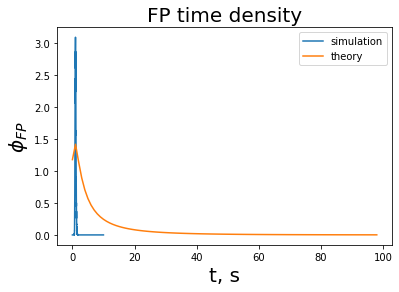

In [14]:
plt.plot(T, phi_FP,label='simulation')
plt.plot([fi_th(1,1,1,t) for t in np.arange(0.1,10,0.1)],label='theory')
plt.legend()
plt.title('FP time density',fontsize=20)
plt.xlabel('t, s',fontsize=20)
plt.ylabel('$\phi_{FP}$',fontsize=20)
plt.show()

$
S(t) = 1-\int_0^{t}\varphi(\tau)d\tau
$

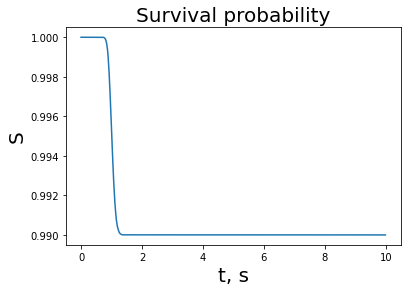

In [ ]:
S = np.zeros_like(T)
for i, t in enumerate(T):
    S[i] = 1 - np.sum(phi_FP[:i] * dt)
plt.plot(T, S)
plt.title('Survival probability',fontsize=20)
plt.xlabel('t, s',fontsize=20)
plt.ylabel('S',fontsize=20);

mean first passage time
$
<T> = \int_0^{t^*}t φ_{FR}(t)dt
$

In [ ]:
tmax_index = int(tmax/dt)
T_mfpt = np.sum( T * phi_FP *dt )
print("T_mfpt = {:.4}".format(T_mfpt))

T_mfpt = 0.0101


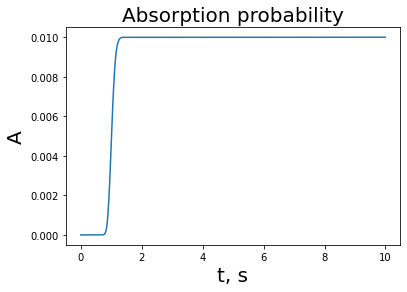

In [ ]:
plt.plot(T, 1-S)
plt.title('Absorption probability',fontsize=20)
plt.xlabel('t, s',fontsize=20)
plt.ylabel('A',fontsize=20);

# 2. Kramers formula (5 points)

(a) Consider a diffusion on an interval $[0,1]$ with a reflecting boundary on the left and an adsorbing boundary on the right. Assume that the initial condition is given by $P(x,t= 0) =δ(x−0.25)$ and the potential has the following form,
$$
U(x)= \begin{cases}
\omega(x-0.25)^{2}, & \text { if } 0 \leq x \leq 0.5 \\ \omega / 8-\omega(x-0.75)^{2}, & \text { if } 0.5 \leq x \leq 1
\end{cases}
$$
Find an estimation for the mean first-passage time (MFPT) from the Kramers formula.

The mean first passage time $T_{MFPT}$ can be estimated as
$$
T_{\mathrm{MFPT}}=\frac{2 \pi \gamma \mathrm{e}^{\Delta U / k_{\mathrm{B}} T}}{\left|U^{\prime \prime}\left(x_{\min }\right) U^{\prime \prime}\left(x_{\max }\right)\right|^{1 / 2}}
$$
where $\Delta U=U\left(x_{\max }\right)-U\left(x_{\min }\right)$.

In [ ]:
def U(x,w):
    assert(0<=x<=1)
    if 0 <= x <= 0.5:
        return w* (x-0.25)**2
    elif 0.5 < x <= 1:
        return w/8 - w*(x-0.75)**2
def T(w):
    return 2*np.pi*1*np.exp(U(0.75,w)-U(0.25,w))/(2*w)
Tmfpt_kr = [T(w) for w in np.linspace(10,30)]

(b) Write a program which computes the mean first-passage time by simulating a discrete jump process on a lattice. Keep in mind that the left boundary of the interval is reflecting while the right one is absorbing. The period of a lattice $δx$ should be relatively small. Use the Monte Carlo algorithm from the paper uploaded into the assignments folder as Doering.pdf (Eqs. 12-17 in the paper) for making decisions about jump directions according to values ofthe potential. Assume that the system is kept at constant temperature $k_BT= 1$. Compare the results with (a) for $ω= 10,20,30$. Does the Kramers formula work well? Discuss an agreement between the simulation results and Kramers formula.

In [ ]:
Nruns = 100

w = [10,20,30]
x_0 = 0.25
t_tot = np.zeros((len(w),Nruns))
dx = 0.01
N = int(1/dx) + 1  # number of nodes
n0 = int(x_0/dx) #initial index: x[n0] = x_0
x = np.linspace(0,1,N)
dU = np.zeros(N)
Un = np.zeros(N)
Dn = np.zeros(N)

In [ ]:
t_tot = np.zeros((len(w),Nruns))
for i in range(len(w)):   
    for j in range(1,N):
        dU[j]=U(x[j],w[i])-U(x[j-1],w[i]) # dU[0] is undefined!
    Un[:-1] =dx**(-2)*np.exp( -dU[1:] / 2 ) # Un[N-1] is undefined
    Dn[1:] =dx**(-2)*np.exp(е +dU[1:] / 2 ) # Dn[0] is undefined
    
    for k in tqdm(range(Nruns)):
        n = n0
        while n != N-1:
            X1 = np.random.rand()+1e-12
            t = -(Un[n]+Dn[n])**(-1)*np.log(X1)
            t_tot[i,k]+=t

            if n==1:
                n+=1
                continue
            X2 = np.random.rand()
            if X2 > Dn[n]/(Dn[n]+Un[n]):
                n+=1
            else:
                n-=1
Tmfpt = np.mean(t_tot, axis = 1)

100%|██████████| 100/100 [00:37<00:00,  2.70it/s]


In [2]:
import numpy as np

In [5]:
Tmfpt_kr = [T(w) for w in np.linspace(10,30)]
plt.scatter(w, Tmfpt, label = 'Monte Carlo')
plt.plot(np.linspace(10,30),Tmfpt_kr, label = 'Kramers')
plt.xlabel("w", fontsize=20)
plt.ylabel("$T_{MFPT}$", fontsize=20)
plt.title("$T_{MFPT}$ ", fontsize=20)
plt.legend()
plt.show()

NameError: name 'T' is not defined

**Kramers formula works well**

# 3. Numerical methods for Fokker-Planck equation* (2 points)